In [1]:
#install packages 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [2]:
#load data
df = pd.read_csv("CustSpendPred.csv")

In [3]:
# Check data
df.head()

,Unit Price,Profit,Sales,Responder
0,2,-5,2,0
1,2,-11,3,0
2,3,38,3,0
3,3,1,3,0
4,3,-8,3,0


In [4]:
#Perform Exploratory Data Analysis (EDA) / preprocessing 
#plot one of the variables
sns.countplot(x = "bmi", data = df)

ValueError: Could not interpret input 'bmi'

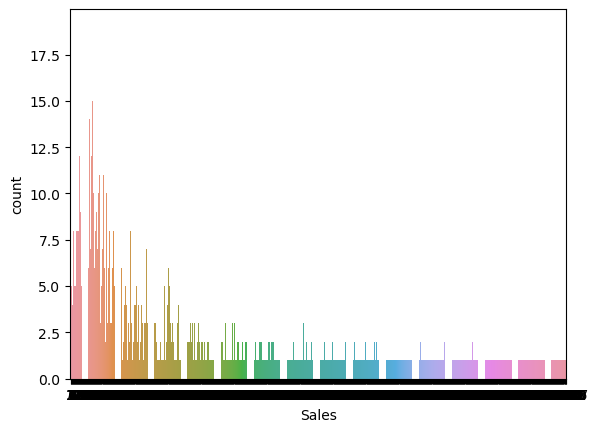

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the variable 'Sales'
sns.countplot(x="Sales", data=df)
plt.show()

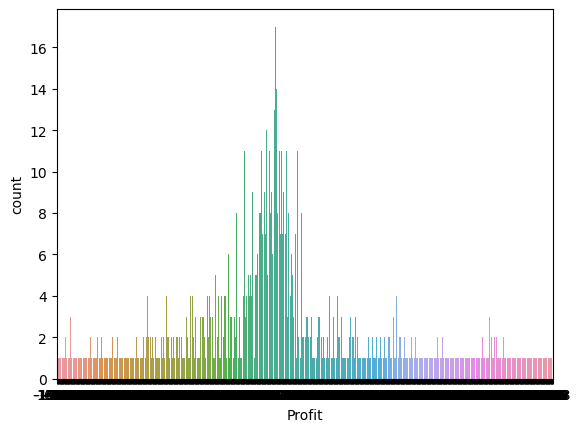

In [7]:
# Plotting the variable 'Profit'
sns.countplot(x="Profit", data=df)
plt.show()

In [8]:
#check whether the data has NA
df.isnull().sum()

Unit Price    0
Profit        0
Sales         0
Responder     0
dtype: int64

In [9]:
#Remove null values
df.dropna(inplace = True)

In [10]:
#Change text to integers data type.
label_encoder = preprocessing.LabelEncoder()
obj = (df.dtypes == 'object')
for col in list(obj[obj].index):
  df[col] = label_encoder.fit_transform(df[col])

In [11]:
# Define x and y variables
X = df.drop('Profit', axis=1)
Y = df['Profit']


In [12]:
X.shape,Y.shape
  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.4,
                                                    random_state=1)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1171, 3), (781, 3), (1171,), (781,))

In [13]:
#Normalize/scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
#build the model
MedSpend = DecisionTreeClassifier()
MedSpend.fit(X_train, Y_train)

DecisionTreeClassifier()

In [15]:
#1 Evaluate the results using accuracy score with train data
MedSpend.score(X_train, Y_train)

0.9171648163962425

In [16]:
#2 Evaluate the results using accuracy score with test data
MedSpend.score(X_test, Y_test)

0.012804097311139564

In [17]:
#3 check confusion matrix 
cm = confusion_matrix(Y, MedSpend.predict(X))
print(cm)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


/Users/rodri/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [18]:
from sklearn.metrics import confusion_matrix

# Assuming 'X' contains features and 'Y' is the 'Responder' column

# Predict the responses for 'X' data
Y_pred = MedSpend.predict(X)

# Calculate the confusion matrix
cm = confusion_matrix(Y, Y_pred)
print(cm)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


/Users/rodri/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [19]:
#Create the prediction
y_pred = MedSpend.predict(X_test)

In [20]:
#create dataframe for actual and predicted values 
MedSpend=pd.DataFrame({'Actual': Y_test, 'predicted': y_pred})

In [22]:
#print the new dataframe
print(MedSpend)

      Actual  predicted
982      -56       -100
534     -100         45
1237      46        -99
1009      19       -121
1542     719        -17
...      ...        ...
733       29        -66
383        2       -220
725       70        -37
310        1        -76
594     -160        -64

[781 rows x 2 columns]


In [23]:
#Save the new dataframe to Excel
MedSpend.to_csv("C:/Users/petet/My Python Codes/CustSpendPred.csv")

OSError: Cannot save file into a non-existent directory: 'C:/Users/petet/My Python Codes'

In [26]:
# For CSV
MedSpend.to_csv("CustSpendPred.csv")

# For Excel
MedSpend.to_excel("CustSpendPred.xlsx", index=False)
